In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd
import uproot
import awkward as ak
import seaborn as sn
mpl.style.use('seaborn-talk')
mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['figure.dpi'] = 120

In [2]:
data_path = "/disk/atlas3/data_MC/ATLASOpen/jets/part1.root:JetRecoTree" 
keys = ["EventNumber", "EventWeight", "Clusters*", "TruthJets_R10*"]

In [3]:
#Open file in with-function will close it when you exit
def get_branches(rootfile:str, keys):
    with uproot.open(rootfile) as file:
        print(file.keys())
        events = file.arrays(filter_name=keys, library="ak", how="zip")
        return events

data = get_branches(data_path, keys)

['EventNumber', 'RunNumber', 'EventWeight', 'mu_average', 'mu_actual', 'NPV', 'Tracks_pt', 'Tracks_eta', 'Tracks_phi', 'Tracks_m', 'Tracks_vtx', 'Clusters_pt', 'Clusters_eta', 'Clusters_phi', 'Clusters_m', 'Particles_pt', 'Particles_eta', 'Particles_phi', 'Particles_m', 'Particles_pdgID', 'RecoJets_R4_pt', 'RecoJets_R4_eta', 'RecoJets_R4_phi', 'RecoJets_R4_m', 'RecoJets_R4_jvf', 'TrackJets_R4_pt', 'TrackJets_R4_eta', 'TrackJets_R4_phi', 'TrackJets_R4_m', 'RecoJets_R10_pt', 'RecoJets_R10_eta', 'RecoJets_R10_phi', 'RecoJets_R10_m', 'RecoJets_R10_D2beta1', 'RecoJets_R10_tau32wta', 'RecoJets_R10_Trimmed_pt', 'RecoJets_R10_Trimmed_eta', 'RecoJets_R10_Trimmed_phi', 'RecoJets_R10_Trimmed_m', 'RecoJets_R10_Trimmed_D2beta1', 'RecoJets_R10_Trimmed_tau32wta', 'TruthJets_R4_pt', 'TruthJets_R4_eta', 'TruthJets_R4_phi', 'TruthJets_R4_m', 'TruthJets_R10_pt', 'TruthJets_R10_eta', 'TruthJets_R10_phi', 'TruthJets_R10_m', 'TruthJets_R10_D2beta1', 'TruthJets_R10_tau32wta', 'TruthJets_R10_Trimmed_pt', 'Tru

In [78]:
data["n_jets"] = ak.num(data["TruthJets_R10"])
njets = ak.to_numpy(data.n_jets)
print(njets)

[3 3 2 ... 0 2 0]


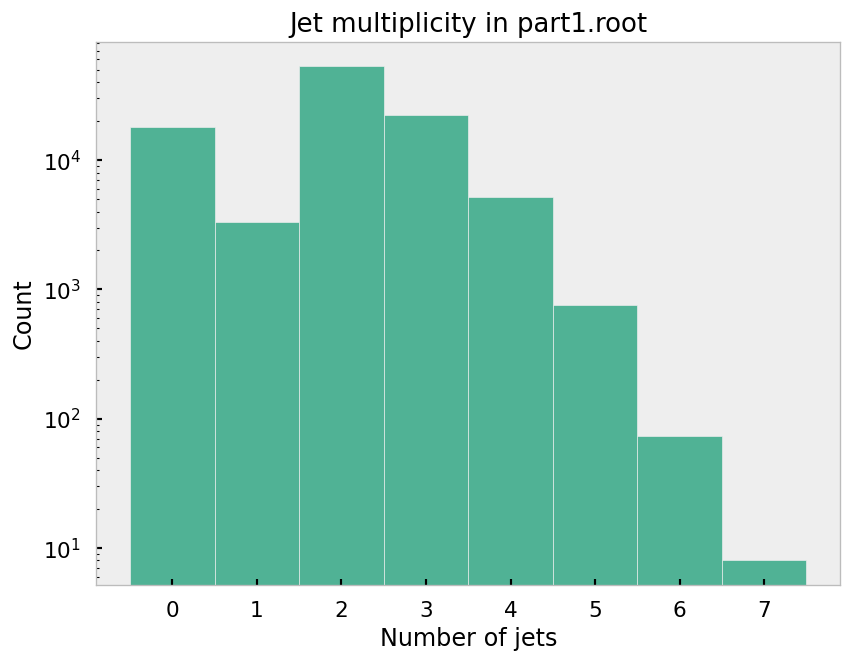

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
sn.histplot(njets, ax = ax, bins=7, binwidth=1, binrange=[-0.5, 7.5], color="#1b9e77")
ax.set_title("Jet multiplicity in part1.root")
ax.set_xlabel("Number of jets")
ax.set_yscale('log')
ax.grid(visible=None)

In [71]:
jets = [data[data.n_jets == i] for i in range(4)]
max_len = max([len(jet) for jet in jets])
first_pt = [jet.Clusters.pt[:,0] for jet in jets]
weights = [jet.EventWeight for jet in jets]
first_pt = ak.to_numpy(ak.pad_none(first_pt, max_len, axis=1))
weights = ak.to_numpy(ak.pad_none(weights, max_len, axis=1))

Text(0.5, 0, 'Energy [GeV]')

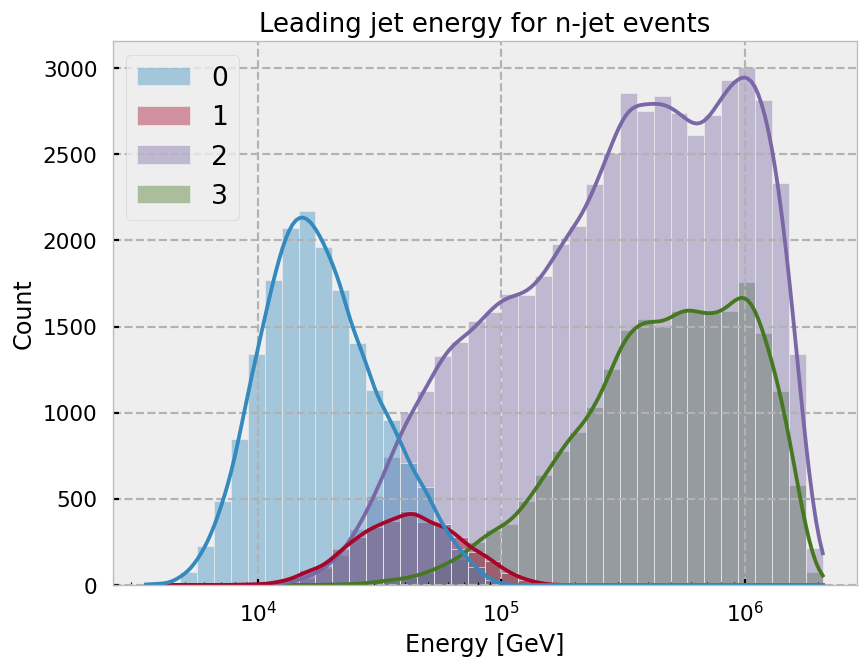

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
sn.histplot([item for item in first_pt], bins=40, log_scale=True, ax=ax, alpha=0.4, kde=True, legend=["0 jets", "1 jets", "2 jets", "3 jets"])
ax.set_title("Leading jet energy for n-jet events")
ax.set_xlabel("Energy [GeV]")

Text(0.5, 0, 'Event weight')

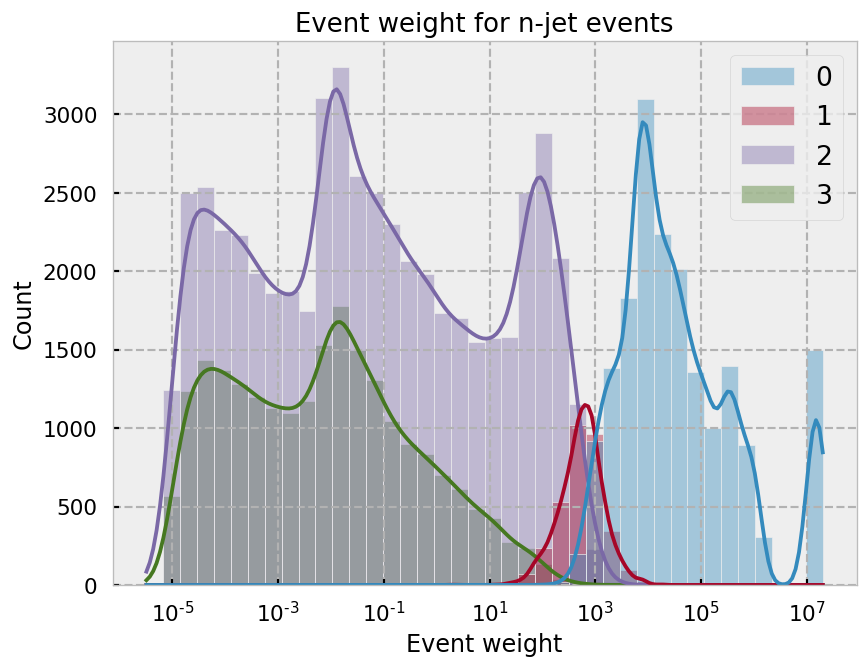

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
sn.histplot([item for item in weights], bins=40, log_scale=True, ax=ax, alpha=0.4, kde=True, legend=["0 jets", "1 jets", "2 jets", "3 jets"])
ax.set_title("Event weight for n-jet events")
ax.set_xlabel("Event weight")